CREDIT SCORING MODEL - ML PROJECT

1. LOADING DATASET
----------------------------------------------------------------------
✓ Dataset loaded successfully!
Dataset Shape: (1000, 10)

First few rows:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  

Dataset Info:
<class 'pandas.core.frame.Dat

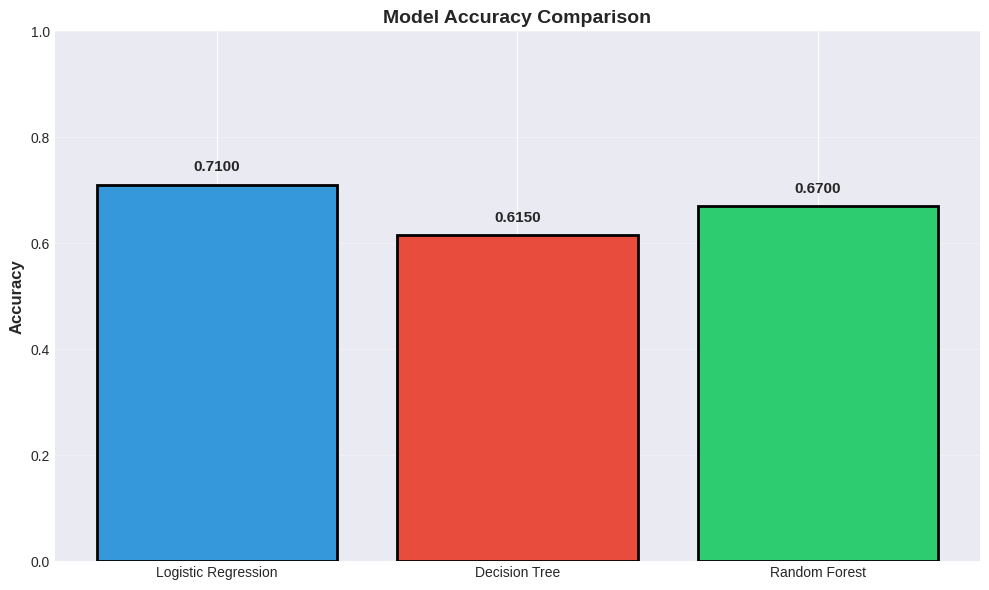


2. Generating Model Metrics Comparison chart...
✓ Saved: 02_metrics_comparison.png


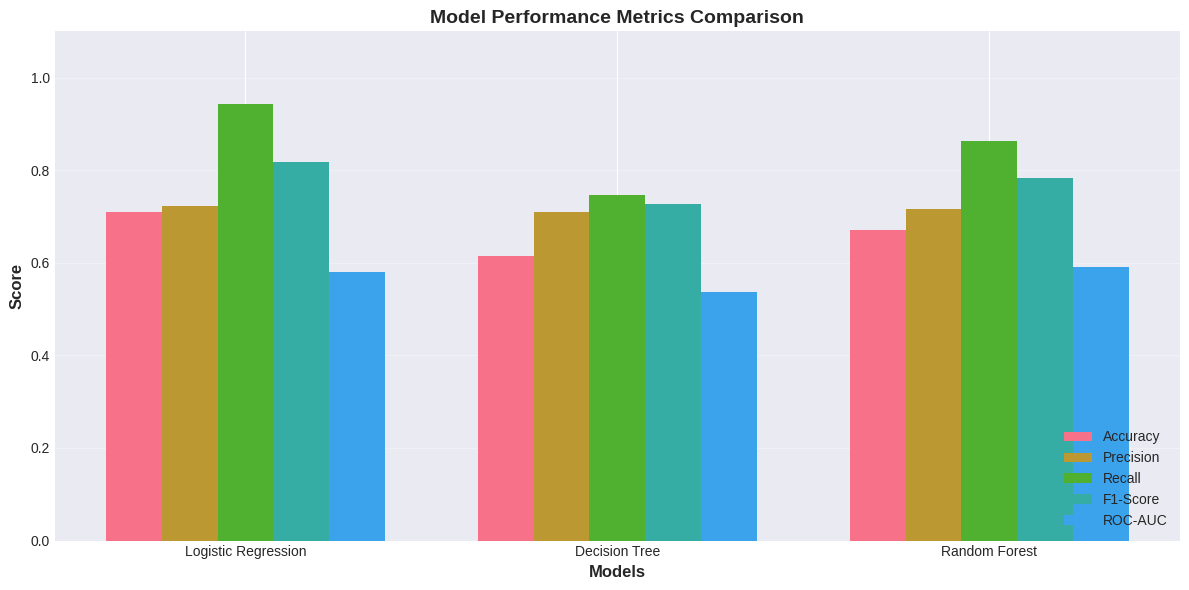


3. Generating ROC Curves...
✓ Saved: 03_roc_curves.png


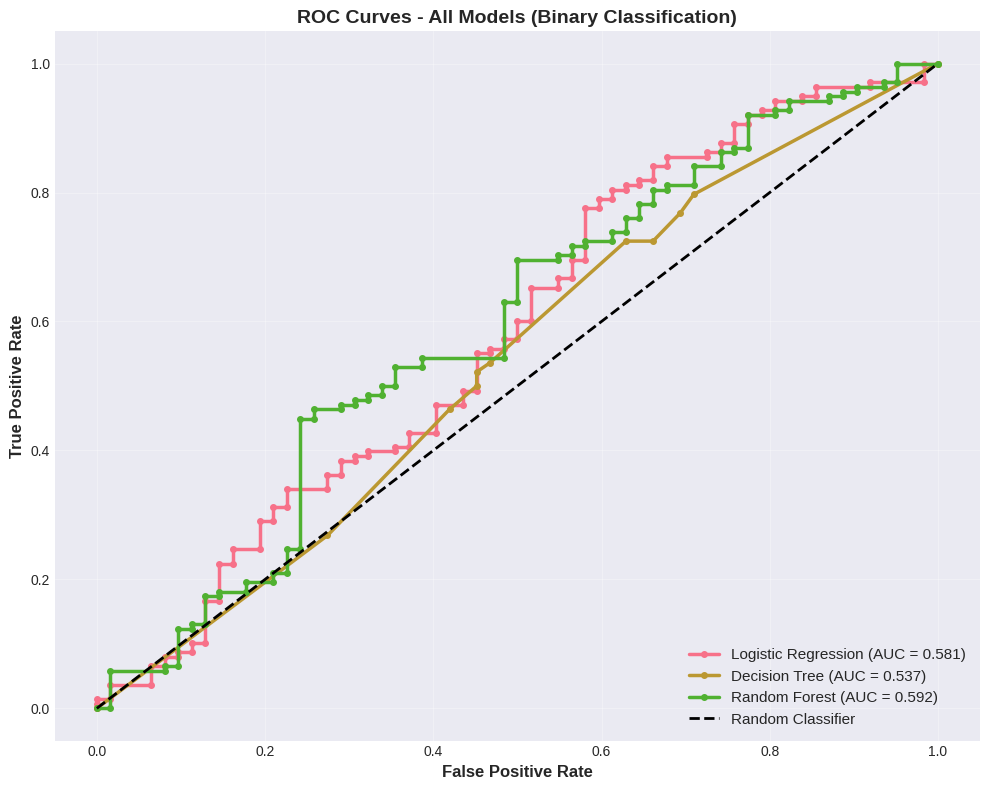


4. Generating Confusion Matrices...
✓ Saved: 04_confusion_matrices.png


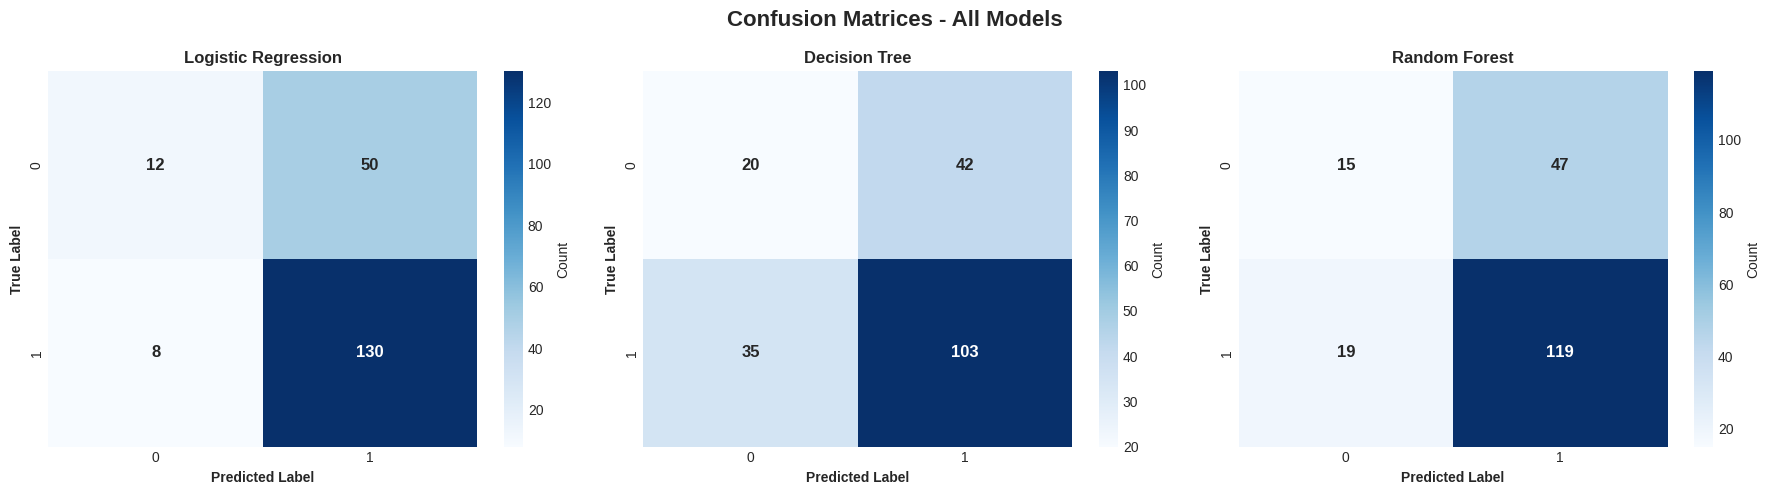


5. Generating Feature Importance chart...

9. FEATURE IMPORTANCE
----------------------------------------------------------------------

Top 10 Important Features:
         feature  importance
             Age    0.229450
   Credit amount    0.193095
      Unnamed: 0    0.180445
        Duration    0.105817
         Purpose    0.071594
         Housing    0.061242
 Saving accounts    0.054971
Checking account    0.054164
             Job    0.049221
✓ Saved: 05_feature_importance.png


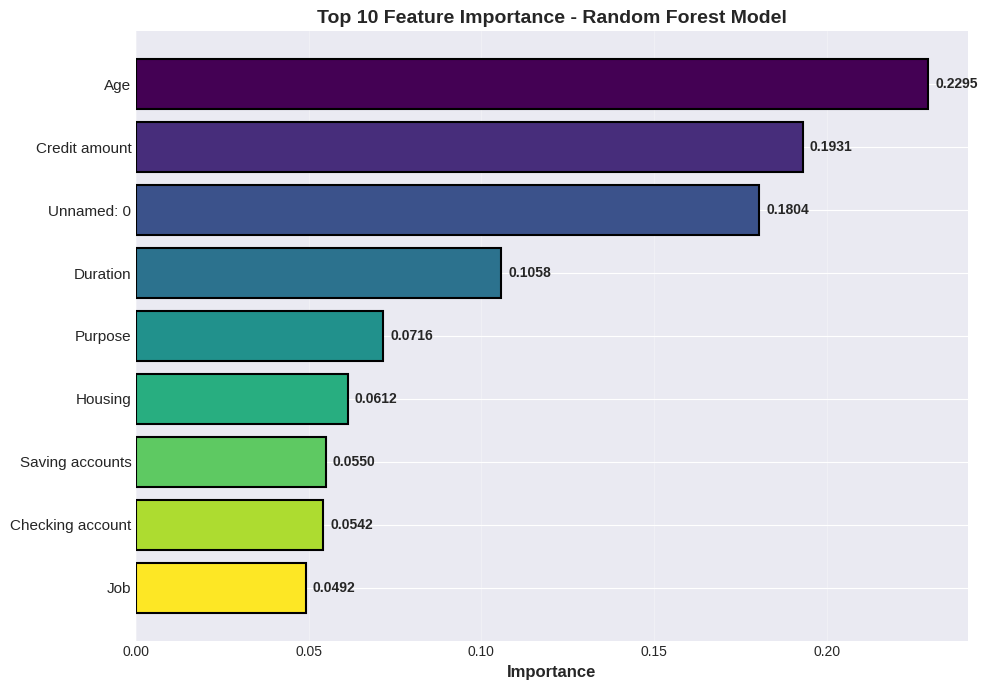


6. Generating Precision-Recall-F1 Comparison chart...
✓ Saved: 06_precision_recall_f1.png


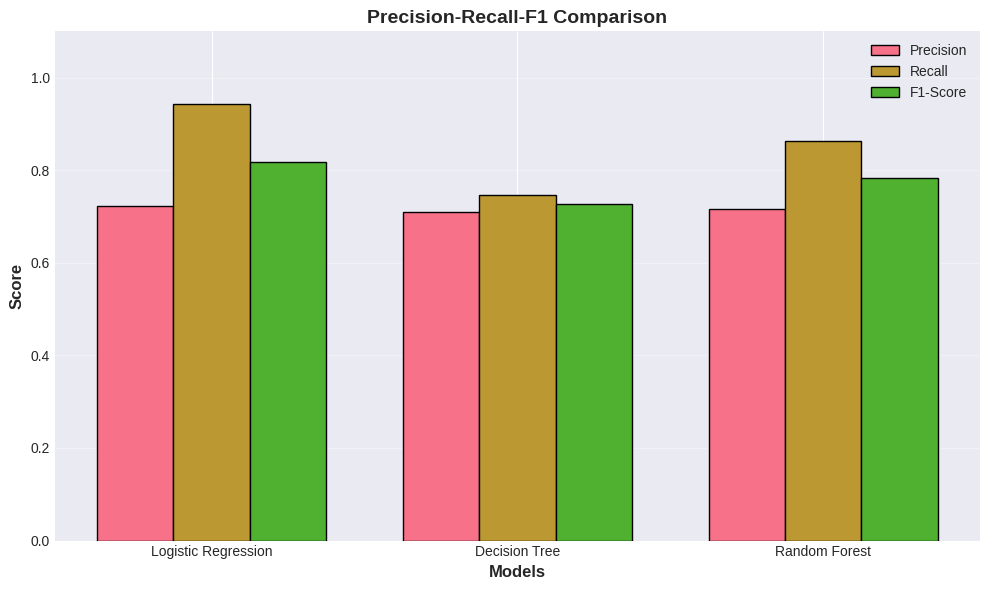


✓ PROJECT COMPLETE!

📊 Generated Visualizations:
  1. 01_accuracy_comparison.png - Model accuracy comparison
  2. 02_metrics_comparison.png - All metrics comparison
  3. 03_roc_curves.png - ROC curves for binary classification
  4. 04_confusion_matrices.png - Confusion matrices
  5. 05_feature_importance.png - Top 10 important features
  6. 06_precision_recall_f1.png - Precision, Recall, F1 comparison



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, auc, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("CREDIT SCORING MODEL - ML PROJECT")
print("="*70)

# ============= STEP 1: LOAD DATA =============
print("\n1. LOADING DATASET")
print("-" * 70)

try:
    df = pd.read_csv('german_credit_data.csv')
    print("✓ Dataset loaded successfully!")
except FileNotFoundError:
    print("⚠ File 'german_credit_data.csv' not found!")
    print("Please ensure the CSV file is in the same directory.")
    exit()

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nDataset Info:")
print(df.info())
print(f"\nMissing Values:\n{df.isnull().sum()}")

# ============= STEP 2: DATA CLEANING =============
print("\n" + "="*70)
print("2. DATA CLEANING")
print("-" * 70)

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))
print("✓ Missing values filled")

# Define target and features - Find binary target column
print("\nAvailable columns:")
print(df.columns.tolist())

# Auto-detect binary target (you can modify this)
target_col = None
for col in df.columns:
    if len(df[col].unique()) == 2:
        target_col = col
        break

if target_col is None:
    # Fallback to a default if no binary column is found
    target_col = 'Job' # Assuming 'Job' as a default based on previous attempt
    print(f"\nNo binary target column auto-detected. Using '{target_col}' as target.")
else:
    print(f"\nAuto-detected binary target: {target_col}")

print(f"Target Distribution:\n{df[target_col].value_counts()}")

y = df[target_col]
X = df.drop(target_col, axis=1)

# Encode categorical variables in features
print("\nEncoding categorical features...")
categorical_cols = X.select_dtypes(include=['object']).columns
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le
    print(f"  ✓ {col} encoded")

# Encode the target variable if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    print(f"\nEncoding target variable '{target_col}'...")
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    print(f"  ✓ Target variable '{target_col}' encoded")
    # Store the mapping for later interpretation if needed
    target_le_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
    print(f"    Mapping: {target_le_mapping}")


print(f"\n✓ {len(categorical_cols)} categorical features encoded")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# ============= STEP 3: TRAIN-TEST SPLIT =============
print("\n" + "="*70)
print("3. TRAIN-TEST SPLIT")
print("-" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# ============= STEP 4: FEATURE SCALING =============
print("\n" + "="*70)
print("4. FEATURE SCALING")
print("-" * 70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features standardized using StandardScaler")

# ============= STEP 5: MODEL TRAINING =============
print("\n" + "="*70)
print("5. MODEL TRAINING")
print("-" * 70)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='auto'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"✓ {name} trained successfully!")

# ============= STEP 6: MODEL EVALUATION =============
print("\n" + "="*70)
print("6. MODEL EVALUATION & METRICS")
print("-" * 70)

results = {}
is_binary = len(np.unique(y)) == 2

for name, model in trained_models.items():
    print(f"\n{name}")
    print("-" * 70)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Get probabilities
    # Only calculate probabilities for binary classification
    y_pred_proba = None
    if is_binary and hasattr(model, 'predict_proba'):
         y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy:  {accuracy:.4f}")

    # Calculate metrics based on classification type
    if is_binary:
        # Ensure pos_label is set to the label corresponding to the positive class (e.g., 1)
        # If the original labels were 'female' and 'male', and 'male' was encoded to 1, use 1.
        # We need to know which label corresponds to the positive class.
        # Assuming the positive class is the one that gets encoded to 1 by LabelEncoder.
        # If the original labels were indeed 'female' and 'male', and 'male' is the positive class:
        try:
            pos_label_val = 1 # Assuming 1 is the positive class after encoding
            precision = precision_score(y_test, y_pred, zero_division=0, pos_label=pos_label_val)
            recall = recall_score(y_test, y_pred, zero_division=0, pos_label=pos_label_val)
            f1 = f1_score(y_test, y_pred, zero_division=0, pos_label=pos_label_val)
            if y_pred_proba is not None:
                 roc_auc = roc_auc_score(y_test, y_pred_proba)
            else:
                 roc_auc = None # ROC AUC requires probabilities

            print(f"Precision: {precision:.4f}")
            print(f"Recall:    {recall:.4f}")
            print(f"F1-Score:  {f1:.4f}")
            if roc_auc is not None:
                print(f"ROC-AUC:   {roc_auc:.4f}")
            else:
                print("ROC-AUC:   N/A (Probabilities not available)")

        except ValueError as e:
             print(f"Could not calculate binary metrics: {e}")
             precision, recall, f1, roc_auc = None, None, None, None


    else:
        # Multi-class metrics
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        roc_auc = None # ROC AUC is typically for binary or one-vs-rest/one-vs-one in multi-class

        print(f"Precision (weighted): {precision:.4f}")
        print(f"Recall (weighted):    {recall:.4f}")
        print(f"F1-Score (weighted):  {f1:.4f}")


    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    print(f"\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'cm': cm
    }

# ============= STEP 7: MODELS COMPARISON =============
print("\n" + "="*70)
print("7. MODELS COMPARISON")
print("-" * 70)

if is_binary:
    results_df = pd.DataFrame({
        'Accuracy': {name: metrics['accuracy'] for name, metrics in results.items()},
        'Precision': {name: metrics['precision'] for name, metrics in results.items()},
        'Recall': {name: metrics['recall'] for name, metrics in results.items()},
        'F1-Score': {name: metrics['f1'] for name, metrics in results.items()},
        'ROC-AUC': {name: metrics['roc_auc'] if metrics['roc_auc'] is not None else np.nan for name, metrics in results.items()}
    })
else:
    results_df = pd.DataFrame({
        'Accuracy': {name: metrics['accuracy'] for name, metrics in results.items()},
        'Precision': {name: metrics['precision'] for name, metrics in results.items()},
        'Recall': {name: metrics['recall'] for name, metrics in results.items()},
        'F1-Score': {name: metrics['f1'] for name, metrics in results.items()}
    })

print("\n" + results_df.to_string())

# Choose best model based on accuracy
best_model_name = results_df['Accuracy'].idxmax()
print(f"\n🏆 Best Model: {best_model_name} (Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f})")

# ============= STEP 8: VISUALIZATION =============
print("\n" + "="*70)
print("8. GENERATING VISUALIZATIONS")
print("-" * 70)

# Plot 1: Model Accuracy Comparison (Simple Bar Chart)
print("\n1. Generating Accuracy Comparison chart...")
fig, ax = plt.subplots(figsize=(10, 6))

accuracy_scores = [results[m]['accuracy'] for m in results]
model_names = list(results.keys())
colors_acc = ['#3498db', '#e74c3c', '#2ecc71']

bars = ax.bar(model_names, accuracy_scores, color=colors_acc, edgecolor='black', linewidth=2)
ax.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax.set_title('Model Accuracy Comparison', fontweight='bold', fontsize=14)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, accuracy_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('01_accuracy_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 01_accuracy_comparison.png")
plt.show()

# Plot 2: Model Metrics Comparison
print("\n2. Generating Model Metrics Comparison chart...")
fig, ax = plt.subplots(figsize=(12, 6))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
if is_binary:
    metrics_to_plot.append('ROC-AUC')

x = np.arange(len(model_names))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    if metric in results_df.columns:
        # Handle potential NaN values for ROC-AUC in multi-class case
        values = results_df.loc[model_names, metric].fillna(0) # Replace NaN with 0 for plotting

        ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Models', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Model Performance Metrics Comparison', fontweight='bold', fontsize=14)
ax.set_xticks(x + width * (len(metrics_to_plot) - 1) / 2) # Adjust tick position
ax.set_xticklabels(model_names)
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('02_metrics_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 02_metrics_comparison.png")
plt.show()

# Plot 3: ROC Curves (Binary Classification)
if is_binary and any(metrics.get('roc_auc') is not None for metrics in results.values()):
    print("\n3. Generating ROC Curves...")
    fig, ax = plt.subplots(figsize=(10, 8))

    for name, model in trained_models.items():
        if results[name]['y_pred_proba'] is not None:
            y_pred_proba = results[name]['y_pred_proba']
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2.5, marker='o', markersize=4)
        else:
            print(f"  Skipping ROC curve for {name} (Probabilities not available)")


    ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
    ax.set_xlabel('False Positive Rate', fontweight='bold', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontweight='bold', fontsize=12)
    ax.set_title('ROC Curves - All Models (Binary Classification)', fontweight='bold', fontsize=14)
    ax.legend(loc='lower right', fontsize=11)
    ax.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('03_roc_curves.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: 03_roc_curves.png")
    plt.show()
else:
    print("\n3. Skipping ROC Curves (Not applicable for multi-class or probabilities not available)")


# Plot 4: Confusion Matrices
print("\n4. Generating Confusion Matrices...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')

for idx, (name, model) in enumerate(trained_models.items()):
    cm = results[name]['cm']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar=True, annot_kws={'size': 12, 'weight': 'bold'},
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(name, fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('True Label', fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.savefig('04_confusion_matrices.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 04_confusion_matrices.png")
plt.show()

# Plot 5: Feature Importance (Random Forest)
print("\n5. Generating Feature Importance chart...")
print("\n9. FEATURE IMPORTANCE")
print("-" * 70)

# Check if Random Forest model exists
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 Important Features:")
    print(feature_importance.head(10).to_string(index=False))

    fig, ax = plt.subplots(figsize=(10, 7))
    top_features = feature_importance.head(10)
    colors_fi = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
    ax.barh(range(len(top_features)), top_features['importance'], color=colors_fi, edgecolor='black', linewidth=1.5)
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features['feature'], fontsize=11)
    ax.set_xlabel('Importance', fontweight='bold', fontsize=12)
    ax.set_title('Top 10 Feature Importance - Random Forest Model', fontweight='bold', fontsize=14)
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(top_features['importance']):
        ax.text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.savefig('05_feature_importance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: 05_feature_importance.png")
    plt.show()
else:
    print("\n5. Skipping Feature Importance chart (Random Forest model not trained)")


# Plot 6: Precision-Recall-F1 Comparison
# Only plot for binary classification as these metrics are typically used for it
if is_binary:
    print("\n6. Generating Precision-Recall-F1 Comparison chart...")
    fig, ax = plt.subplots(figsize=(10, 6))

    metrics_pr_f1 = ['Precision', 'Recall', 'F1-Score']
    x_pos = np.arange(len(model_names))
    width = 0.25

    for i, metric in enumerate(metrics_pr_f1):
        if metric in results_df.columns:
             values = results_df.loc[model_names, metric].fillna(0) # Replace NaN with 0 for plotting
             ax.bar(x_pos + i * width, values, width, label=metric, edgecolor='black', linewidth=1)


    ax.set_xlabel('Models', fontweight='bold', fontsize=12)
    ax.set_ylabel('Score', fontweight='bold', fontsize=12)
    ax.set_title('Precision-Recall-F1 Comparison', fontweight='bold', fontsize=14)
    ax.set_xticks(x_pos + width)
    ax.set_xticklabels(model_names)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 1.1])

    plt.tight_layout()
    plt.savefig('06_precision_recall_f1.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: 06_precision_recall_f1.png")
    plt.show()
else:
    print("\n6. Skipping Precision-Recall-F1 Comparison chart (Not applicable for multi-class)")


print("\n" + "="*70)
print("✓ PROJECT COMPLETE!")
print("="*70)
print("\n📊 Generated Visualizations:")
print("  1. 01_accuracy_comparison.png - Model accuracy comparison")
print("  2. 02_metrics_comparison.png - All metrics comparison")
if is_binary and any(metrics.get('roc_auc') is not None for metrics in results.values()):
    print("  3. 03_roc_curves.png - ROC curves for binary classification")
else:
     print("  3. (Skipped) ROC curves - Not applicable or probabilities not available")
print("  4. 04_confusion_matrices.png - Confusion matrices")
if 'Random Forest' in trained_models:
    print("  5. 05_feature_importance.png - Top 10 important features")
else:
    print("  5. (Skipped) Feature importance - Random Forest model not trained")
if is_binary:
    print("  6. 06_precision_recall_f1.png - Precision, Recall, F1 comparison")
else:
    print("  6. (Skipped) Precision-Recall-F1 Comparison - Not applicable for multi-class")
print("\n" + "="*70)